# Bi-directionality of Tunicate Hearts: A simulation of pacemaker fatigue model

### Sierra Rheaume and Sam Sims
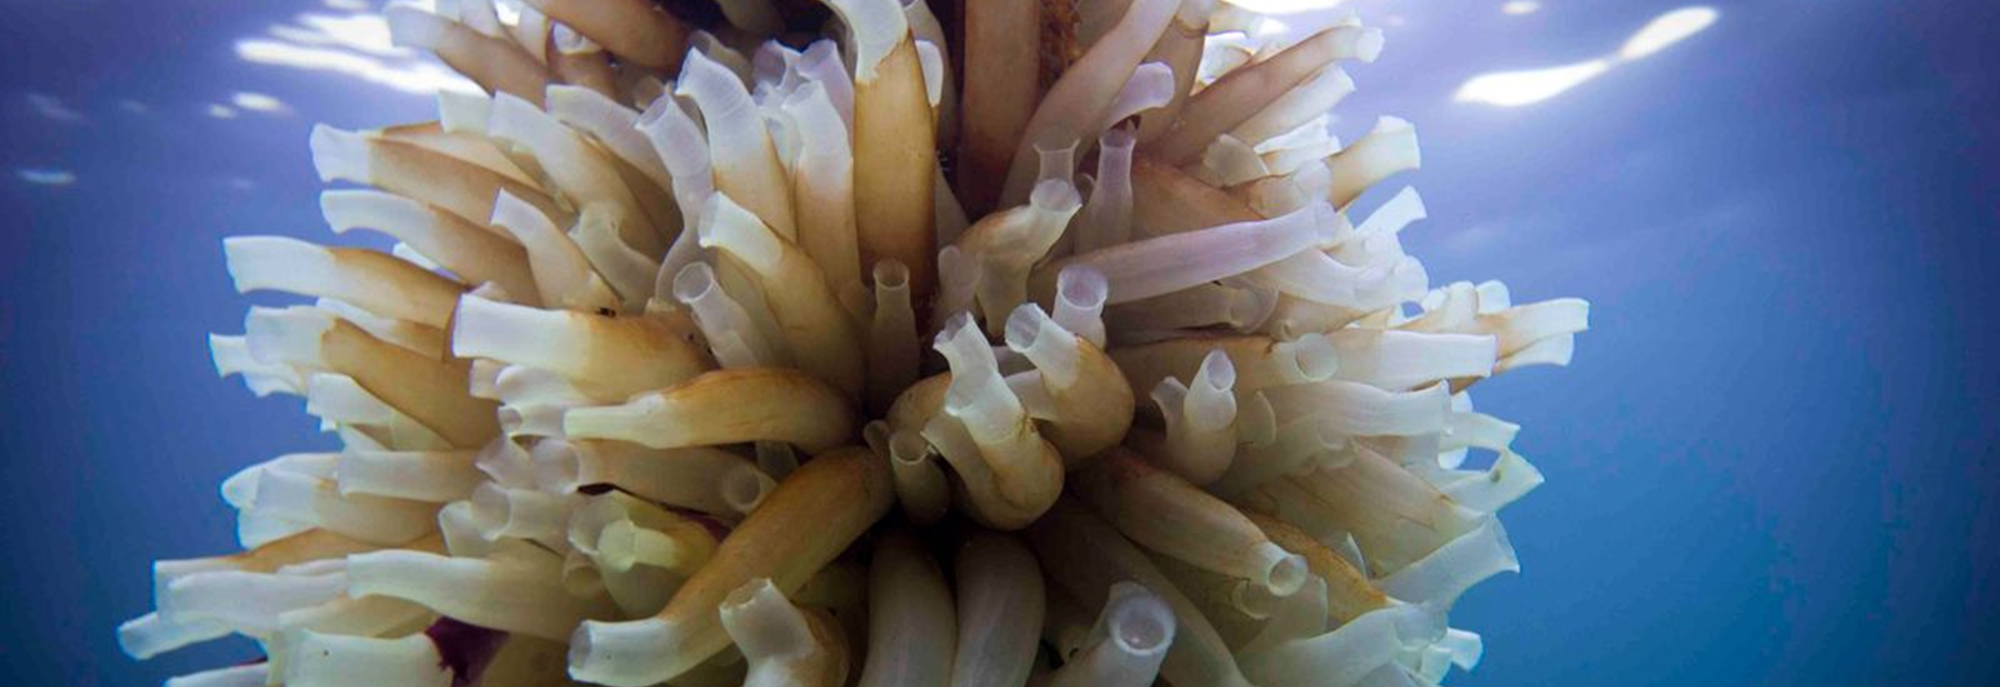


Tunicates, also known as Sea Squirts, have a heart that contains two pacemakers. This makes it so that at any given time there is a dominate pacemaker that determines the direction of blood flow and each pacemaker switches off which is the dominate pacemaker causing the blood to flow in different directions. It has been recordered by M. Anderson that the bloodflow switches directions every 2-3 minutes [3].

Tunicates are the closest invertebrate relative to vertebrates due to their dorsal nerval cord. This makes them a key species in understanding parts of embryotic heart developement [1]. Furthermore, there is a type of arrythmia that can be described as a competition between two pacemakers (one being the normal pacemaker and the other being a spontaneous pacemaker) [2]. By studying a heart that regularly functions with two pacemakers we can develop a further understanding of these types of arrythmias.

Our study is based of of the work of John W. Cain, et. al. [1] and focuses on the pacemaker fatigue theory. Specifically, in our work we take pacemaker fatigue theory to be correct, replicating the work of Cain et al., and simulate a reversal in the action potential of a tunicate heart. Our adjustments to the parameters done by Cain et. al. is that weuse the given tunicate heart parameters for the action potential model instead of mammalian parameters.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

### The Two Current Model Equations:
$$\frac{\partial v}{\partial t} = \kappa \frac{\partial ^2 v}{\partial x^2} + \frac{h}{\tau_{in}}v^2(1-v) - \frac{v}{\tau_{out}}$$
$$\frac{\partial h}{\partial t}
    \begin{cases} 
      \frac{1-h}{\tau_{open}} & v\leq v_{crit} \\
      -\frac{h}{\tau_{close}} & v > v_{crit} 
    \end{cases}$$
    
    
where
$\tau_{in} = 0.3$ms, $\tau_{out} = 3.0$ms, $\tau_{open} = 200$ms, $\tau_{close} = 1300$ms, $\kappa = 10^{-5}$cm$^2$/ms, $v_{crit} = 0.13$


For a $\Delta t = 0.02$ms and $\Delta x = 0.01$cm for a domain of length $L = 3$cm with no flux boundary conditions such that

$$\left.\frac{\partial v}{\partial x}\right|_{x = 0cm} = 0$$
$$\left.\frac{\partial v}{\partial x}\right|_{x = 3cm} = 0$$

Here we are flowing the work of the paper [1], but with the distinction of using tunicate heart parameters. We will be keeping the length of 3 centimeters for the heart, even though their hearts are closer to 8 mm long [3].

In [2]:
tau_in = 0.3
tau_out = 3.0
tau_open = 200
tau_close = 1300
kappa = 10**(-5)
v_crit = 0.13

In [7]:
time=100000
dt= 0.02
dx = 0.01
ntime=int(time/dt);
t= np.zeros(ntime);
v= np.zeros(ntime);
h= np.zeros(ntime);
vn= np.zeros(ntime-1);
hn= np.zeros(ntime-1);
tn= np.zeros(ntime-1);

v[0] = 0.5
h[0] = 1
v[-1] = 0.5
h[-1] = 1

Let's get a quick peak at the action potential in time, using Euler's method

In [8]:
for i in range(0,ntime-1):
    if (i % 300000 == 1):
        v[i-1]=0.29
    t[i]=i*dt;
    v[i]= v[i-1] + dt*((kappa*(v[i-1] - 2*v[i] + v[i+1])/(dx*dx)) + (h[i-1] /tau_in)*v[i-1]*v[i-1]*(1-v[i-1]) - v[i-1]/tau_out)
    if (v[i] <= v_crit):
        h[i]= h[i-1] + dt*((1-h[i-1])/tau_open)
    else:
        h[i] = h[i-1] + dt*(-h[i-1]/tau_close)

        
#Pop off last value
for i in range(0,len(t)-1):
    vn[i] = v[i]
    hn[i] = h[i]
    tn[i] = t[i]
    
#Neumann boundary conditions
vn[0] = vn[1]
vn[-1] = vn[-2]

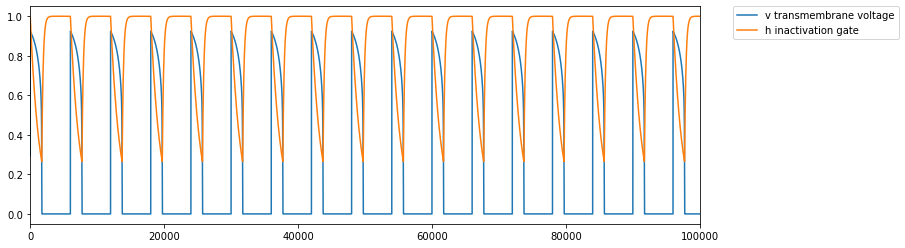

In [9]:
plt.figure(figsize=(12,4))
plt.plot(tn,vn,label='v transmembrane voltage')
plt.plot(tn,hn,label='h inactivation gate')


plt.xlim(0., time)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()  

The heart will be stimulated at both ends by currents which have a period described by the functions:

$$S_{\ell} = B + \frac{A \arctan{(\sin{(2 \pi t /P)}/ \delta)}}{\arctan{(1/\delta)}}$$
$$S_{r} = B - \frac{A \arctan{(\sin{(2 \pi t /P)}/ \delta)}}{\arctan{(1/\delta)}}$$


where $B = 2000$ms, $A = 500$ms, $P = 60,000$ms, and $\delta = 0.1$


Let's check out what those functions look like

In [10]:
time=100000
dt= 0.02
ntime=int(time/dt);
B = 2000
A = 500
P = 60000
delta = 0.1

In [11]:
def Sl(t):
    Sl = B + A * np.arctan(np.sin(2*np.pi*t/P)/delta)/np.arctan(1/delta)
    return Sl

def Sr(t):
    Sr = B - A * np.arctan(np.sin(2*np.pi*t/P)/delta)/np.arctan(1/delta)
    return Sr

In [12]:
S_l= np.zeros(ntime-1);
S_r= np.zeros(ntime-1);

for i in range(0,len(tn)):
    S_l[i] = Sl(tn[i]*1000)
    S_r[i] = Sr(tn[i]*1000)

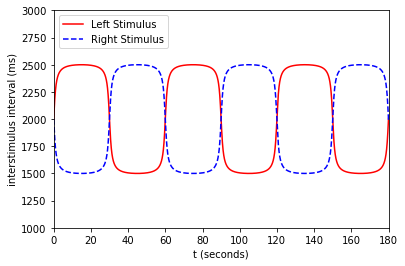

In [13]:
plt.plot(tn,S_l,'r', label = 'Left Stimulus')
plt.plot(tn,S_r,'b--', label = 'Right Stimulus')
plt.xlim(0,180)
plt.ylim(1000,3000)
plt.ylabel('interstimulus interval (ms)')
plt.xlabel('t (seconds)')
plt.legend(loc="upper left")

This graph shows the interstimulus interval, or the gap between stimuli, for each of the two pacemakers. According to this function what we expect to see is the right pacemaker firing quicker than the left pacemaker after time t=0 so we will expect to get a right to left propogation. Then the two pacemakers switch and the left one begins to beat fast causing a left to right propogation. In the middle of the two propogations we expedct to see collisions that anillate both waves such that there is no complete propogation of the action potential (a stall in the heart). This alligns with experimental footage taken of the tunicate heart beat: https://www.youtube.com/watch?v=SM8_wG-XSVg.

Now we need to propogate the action potential through space with a changing stimulus at both ends. In the beginning, there is only simulation from the left pacemaker as seen in the paper. The propogrations are found by discretizing the sinusoidal function seen above in order to establish from the current firing time, when the next firing time will take place. We the solve using the implicit Euler Method, or Thomas Algorithm, for the action potential as it propogates through space.

appended curve at  400.0
appended curve at  800.0
appended curve at  1200.0
appended curve at  1600.0
appended curve at  2000.0
appended curve at  2400.0
appended curve at  2800.0
appended curve at  3200.0
appended curve at  3600.0
appended curve at  4000.0
appended curve at  4400.0
appended curve at  4800.0
appended curve at  5200.0
appended curve at  5600.0
appended curve at  6000.0
appended curve at  6400.0
appended curve at  6800.0
appended curve at  7200.0
appended curve at  7600.0
appended curve at  8000.0
appended curve at  8400.0
appended curve at  8800.0
appended curve at  9200.0
appended curve at  9600.0
appended curve at  10000.0
appended curve at  10400.0
appended curve at  10800.0
appended curve at  11200.0
appended curve at  11600.0
appended curve at  12000.0
appended curve at  12400.0
appended curve at  12800.0
appended curve at  13200.0
appended curve at  13600.0
appended curve at  14000.0
appended curve at  14400.0
appended curve at  14800.0
appended curve at  15200.0


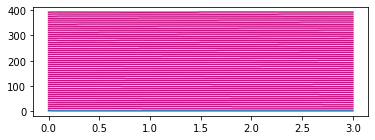

The time of execution of above program is : 845478.7652492523 ms


In [17]:
import time 
# record start time
start = time.time()

L = 3.0
timet=20000;
dt=0.02;
dx=0.01;
kappa = 10**-5
number=int(3/dx);
D=kappa;
DD=D*dt/(dx*dx);
aa=-DD;
cc=-DD;
bb=(1.-2.*aa);
ntime=int(timet/dt);
t= np.zeros(ntime);
x = x=np.linspace(0,3,floor(L/dx),endpoint=True); 
#x= np.arange(number)
h= np.zeros(number);
un= np.zeros(number);
v= np.zeros(number);
alpha=np.zeros(number);
beta=np.zeros(number);
FF=np.zeros(number);
plt.figure(figsize=(6,2))

noCurves = 50
tpercurve = floor(timet/noCurves)
indpercurve = floor(tpercurve/dt)
vcurves = np.ones((noCurves+1,number))

for i in range(0,4):
    v[i]=0.5
vcurves[0] = v
tcurves = [0.]

for i in range(0,number-1):
    h[i] = 1.0
    
plt.plot(x,v)


lstim_i = [floor(2000/dt)]
rstim_i = [floor(2000/dt)]
count = 0
tt=0

#Making arrays of indexes that are stimulation times
#tt must be larger than total time sim so
while tt < 30000:
    newl = lstim_i[count]*dt + S_l[lstim_i[count]]
    newr = rstim_i[count]*dt + S_r[rstim_i[count]]
    lstim_i.append(floor(newl/dt))
    rstim_i.append(floor(newr/dt))
    tt = newl
    count += 1
    
rstim_i.pop(0)

aC = np.zeros(number) ;
bC = np.zeros(number) ;
cC = np.zeros(number) ;
dC = np.zeros(number) ;

cp = np.zeros(number) ;
dp = np.zeros(number) ;

for i in range (0,number):
    aC[i]=-DD ;
    cC[i]=-DD ;
    bC[i]=1+2*DD ;
cC[0]=-2*DD ;
aC[-1]=-2*DD ;

cp[0]=cC[0]/bC[0];
for i in range (1,number-1):
    cp[i]=cC[i]/(bC[i]-aC[i]*cp[i-1]);
     
def FV(vi,hi):   #was FU()
    return (hi/tau_in)*vi*vi*(1-vi)-vi/tau_out ;
def FH(vi,hi):  #Was FV()
    #if vi <= v_crit:
     #   return (1-hi)/tau_open
    #else:
    #    return -hi/tau_close
    temp = np.zeros(len(hi))
    for i in range(len(hi)):
        if vi[i] <= v_crit:
            temp[i] = (1-hi[i])/tau_open
        else:
            temp[i] = -hi[i]/tau_close
    return temp


curvecount = 1
ll,rr = 0,0
for it in range(1,ntime):  # time integration 
    #calculate the rest of the alphas and betas
    ttt = it*dt 
    #Stimulus
    if it%lstim_i[ll] == 0:
        for z in range(0,5):  #Stimulating first 5 on left
            v[z]=0.5 
        ll+=1
    if it%rstim_i[rr] == 0:
        for z in range(number-6,number-1):
            v[z] = 0.5
        rr += 1
        
    #Boundary conditions    
    v[0] = v[2]    
    v[-1] = v[-3]
    
    dC[1:-1]=FV(v[1:-1],h[1:-1])*dt+v[1:-1] ;
    dC[0]=0 ;
    dC[-1]=0 ;
    dp[0]=dC[0]/bC[0] ;
    for i in range(1,number-1):
        dp[i]=(dC[i]-aC[i]*dp[i-1])/(bC[i]-aC[i]*cp[i-1]);
         
    #v[-1]=dp[-1]
    for i in range(number-2,-1,-1):
        v[i]=dp[i]-cp[i]*v[i+1];
    h=h+FH(v,h)*dt ;    
    #plt.plot(x,u+it,label='u voltage') 
    
    if(it % indpercurve == 0):
        
        plt.plot(x,v+it*.0004,color='mediumvioletred')
        tcurves.append(ttt)
        vcurves[curvecount] = v
        curvecount += 1
        print('appended curve at ',ttt)
end = time.time()
plt.show()

plt.show()
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

In [18]:
from ipywidgets import interactive
def f(curve=0):
    plt.figure(figsize=(9,3))   
    plt.plot(x,vcurves[curve]);
    plt.xlabel('Length')
    plt.ylabel('voltage')
    plt.ylim(-.5,1.2)
    plt.xlim(0,3)
    plt.show();
    print('time = ', tcurves[curve]/1000,'s')
    
interactive_plot = interactive(f, curve=(0, len(vcurves)-2, 1))
output = interactive_plot.children[-1]
output.layout.height = '250px'
interactive_plot

interactive(children=(IntSlider(value=0, description='curve', max=49), Output(layout=Layout(height='250px'))),…

With the left pacemaker firing alone at the beginning within the time frame of almost 20 seconds we see one reversal. This is predicted by our sinusoidal interstimulus interval function. As we can see with this model the reversals would be percisly timed. We could adjust the periods of the model so that the reversals occur between 2-3 minutes, but they would be more percise than that large window. This lead the Cain et. al. to conclude that there was also a factor of noise in the interstimulous period which accounted for this large window of time. But we are not conviced because this work requires the initial assumption that pacemaker fatigue theory is the correct theory and does not explore other alternatives such as wave instability.

### References
[1] J. W. Cain, L. He, and L. Waldrop, Phys. Rev. E 102, 062421 (2020).

[2] K. Diagne et al, Phys. Rev. Lett. 130, 028401 (2023).

[3] M. Anderson, J. Exp. Biol. 49, 363 (1968).